In [1]:
# Import necessary libraries
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the FMCG business data from a CSV file
fmcg_df = pd.read_csv('dataset/FMCG_business_data_2022_2024.csv')

In [3]:
# Display the first few rows of the dataframe
fmcg_df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


In [4]:
# Display the summary information of the dataframe
fmcg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  object 
 1   sku              190757 non-null  object 
 2   brand            190757 non-null  object 
 3   segment          190757 non-null  object 
 4   category         190757 non-null  object 
 5   channel          190757 non-null  object 
 6   region           190757 non-null  object 
 7   pack_type        190757 non-null  object 
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190757 non-null  int64  
 12  delivered_qty    190757 non-null  int64  
 13  units_sold       190757 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 20.4+ MB


#### Data Quality and Overview

##### Cleaning and Preprocessing

In [5]:
# Check for duplicated rows
duplicate_rows = fmcg_df.duplicated().sum()
print(duplicate_rows)

0


In [6]:
# Convert the 'date' column to datetime format
fmcg_df['date'] = pd.to_datetime(fmcg_df['date'])

In [7]:
# Check the uniqueness of the non-numerical values for the quality
print(fmcg_df['brand'].unique())
print('----------------------------')
print(fmcg_df['segment'].unique())
print('----------------------------')
print(fmcg_df['category'].unique())
print('----------------------------')
print(fmcg_df['channel'].unique())
print('----------------------------')
print(fmcg_df['region'].unique())

['MiBrand1' 'MiBrand4' 'YoBrand4' 'YoBrand2' 'YoBrand1' 'YoBrand3'
 'ReBrand1' 'ReBrand4' 'MiBrand3' 'JuBrand3' 'SnBrand2' 'ReBrand2'
 'SnBrand3' 'MiBrand2']
----------------------------
['Milk-Seg3' 'Milk-Seg2' 'Yogurt-Seg2' 'Yogurt-Seg1' 'Yogurt-Seg3'
 'ReadyMeal-Seg2' 'ReadyMeal-Seg1' 'Juice-Seg3' 'SnackBar-Seg3'
 'ReadyMeal-Seg3' 'SnackBar-Seg2' 'SnackBar-Seg1' 'Milk-Seg1']
----------------------------
['Milk' 'Yogurt' 'ReadyMeal' 'Juice' 'SnackBar']
----------------------------
['Retail' 'Discount' 'E-commerce']
----------------------------
['PL-Central' 'PL-North' 'PL-South']


In [8]:
# Check for illogical values in numerical columns
numerical_cols = ['price_unit', 'promotion_flag', 'delivery_days', 'stock_available', 'delivered_qty', 'units_sold']

for col in numerical_cols:
    illogical_values = fmcg_df[fmcg_df[col] < 0]
    if not illogical_values.empty:
        print(f"Illogical values found in {col}:")
        print(illogical_values)
        print()


Illogical values found in stock_available:
             date     sku     brand         segment   category   channel  \
70489  2023-07-26  SN-028  SnBrand2   SnackBar-Seg1   SnackBar  Discount   
83501  2023-09-21  SN-010  SnBrand2   SnackBar-Seg2   SnackBar    Retail   
123633 2024-03-14  RE-007  ReBrand4  ReadyMeal-Seg1  ReadyMeal  Discount   

            region pack_type  price_unit  promotion_flag  delivery_days  \
70489     PL-South    Single        2.91               0              5   
83501   PL-Central    Carton        8.60               1              4   
123633  PL-Central    Carton        2.38               0              4   

        stock_available  delivered_qty  units_sold  
70489                -2             -3          -3  
83501               -12            -11         -25  
123633               -6             -7          -8  

Illogical values found in delivered_qty:
             date     sku     brand         segment   category   channel  \
70489  2023-07-26  SN

In [9]:
# Remove rows with illogical negative values in numerical columns
fmcg_df = fmcg_df[(fmcg_df[numerical_cols] >= 0).all(axis=1)]

##### Feature Engineering

In [9]:
# Add a new column for revenue

fmcg_df['revenue'] = (fmcg_df['price_unit'] * fmcg_df['units_sold']).round(2)

# Add a new column for stock left after sales
fmcg_df['stock_left'] = (fmcg_df['stock_available'] - fmcg_df['units_sold']).round(2)

# Flag stockouts where stock left is less than or equal to zero
fmcg_df['stockout_flag'] = (fmcg_df['stock_left'] <= 0).astype(int)

In [10]:
fmcg_df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,revenue,stock_left,stockout_flag
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,21.42,132,0
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,0.00,0,1
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,32.00,110,0
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,36.12,74,0
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,91.92,136,0


##### Descriptive Statistics and Distributions

In [11]:
# Get basic descriptive statistics for important columns
stats = fmcg_df[['price_unit', 'revenue','units_sold', 'delivery_days']].describe()
print(stats)

          price_unit        revenue     units_sold  delivery_days
count  190757.000000  190757.000000  190757.000000  190757.000000
mean        5.251979     104.590136      19.919709       3.004860
std         2.166705      79.526062      11.770077       1.414626
min         1.500000    -215.000000     -25.000000       1.000000
25%         3.380000      50.500000      12.000000       2.000000
50%         5.250000      85.440000      18.000000       3.000000
75%         7.130000     136.160000      25.000000       4.000000
max         9.000000    1145.600000     139.000000       5.000000


In [12]:
# Check distribution counts for 'delivery_days'
delivery_days_counts = fmcg_df['delivery_days'].value_counts().sort_index()
print(delivery_days_counts)

delivery_days
1    38129
2    37813
3    38023
4    38586
5    38206
Name: count, dtype: int64


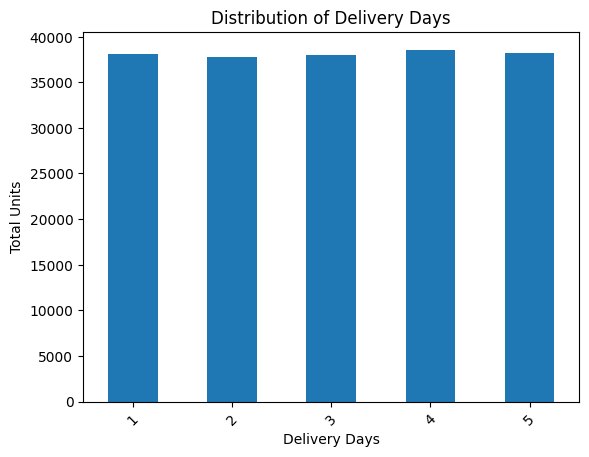

In [13]:
delivery_days_counts.plot(kind='bar')

plt.xlabel('Delivery Days')
plt.ylabel('Total Units')
plt.title('Distribution of Delivery Days')
plt.xticks(rotation=45)
plt.show()

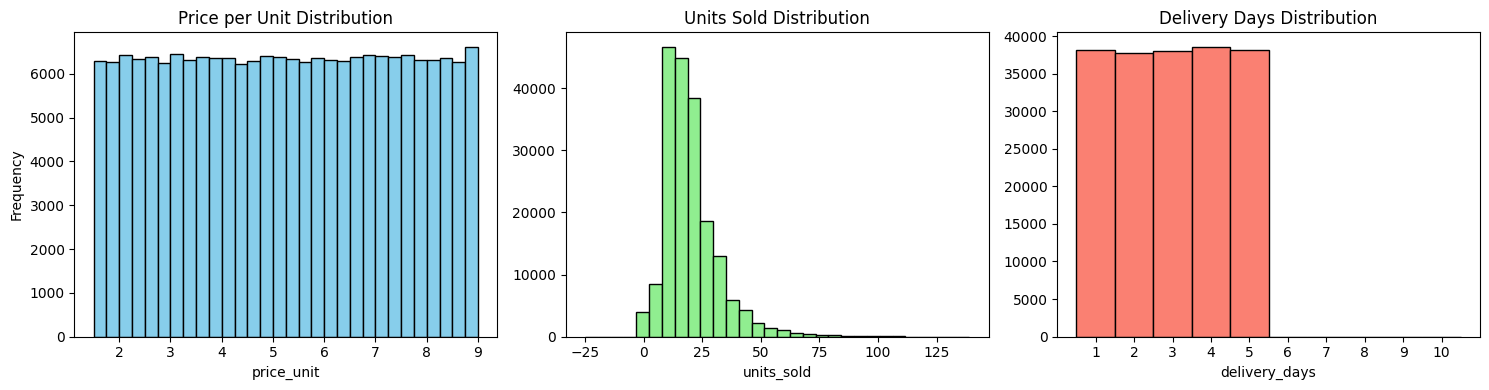

In [15]:
# Plot histograms for continuous numeric variables
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(fmcg_df['price_unit'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price per Unit Distribution')
plt.xlabel('price_unit')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(fmcg_df['units_sold'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Units Sold Distribution')
plt.xlabel('units_sold')

plt.subplot(1, 3, 3)
plt.hist(fmcg_df['delivery_days'], bins=range(1,12), color='salmon', edgecolor='black', align='left')
plt.title('Delivery Days Distribution')
plt.xlabel('delivery_days')
plt.xticks(range(1,11))

plt.tight_layout()
plt.show()

###### The business insight from these histograms is: Pricing distribution is even across all available price points, indicating no specific price band dominates sales and that customers are willing to purchase SKUs at any price within the range. The most frequent sales transactions involve 15 to 20 units per SKU, suggesting this is the preferred purchase size among customers. Additionally, product deliveries are handled efficiently, with almost all products delivered within one to five days and the peak at four days, reflecting effective logistics operations.

#### Sales and Demand Analysis

##### i. Sales Trends Over Time

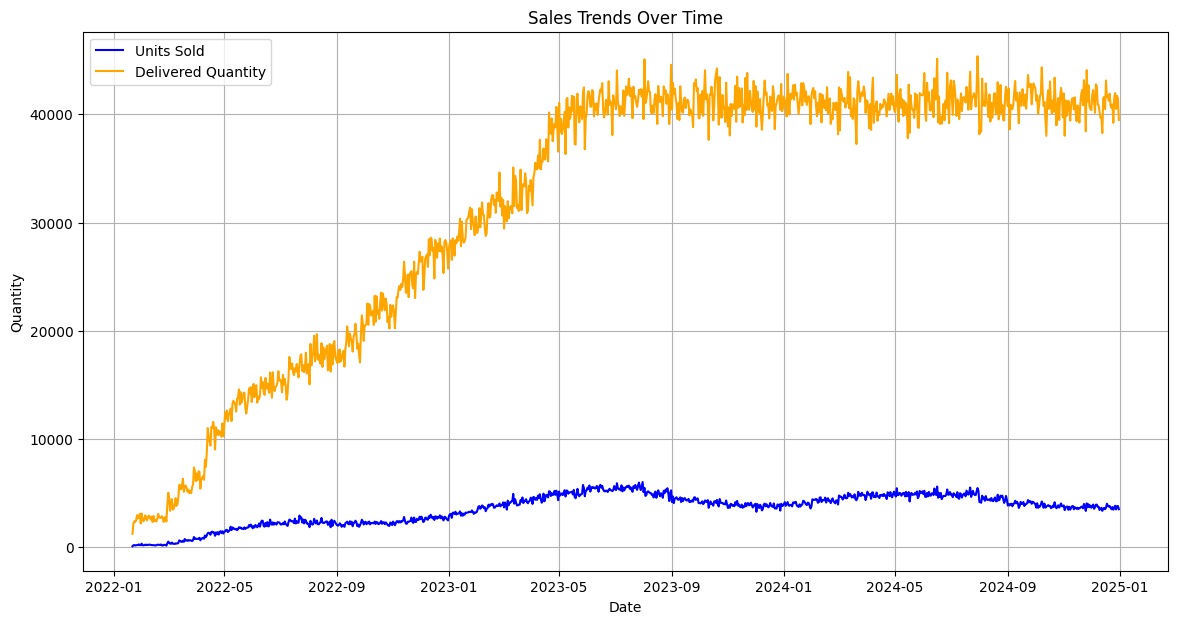

In [16]:
# Analyzing time-series trends of units sold and delivered quantity by date

daily_sales = fmcg_df.groupby('date')[['units_sold', 'delivered_qty']].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(daily_sales['date'], daily_sales['units_sold'], label='Units Sold', color='blue')
plt.plot(daily_sales['date'], daily_sales['delivered_qty'], label='Delivered Quantity', color='orange')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(visible=True)
plt.show()

###### The business insight from the time-series lineplot is that the FMCG business experienced significant growth in both delivered quantities and units sold through 2022 and early 2023, after which deliveries stabilized at a high level while sales plateaued and showed mild declines, indicating maturing demand or shifting market conditions. The persistent difference between delivered and sold quantities suggests excess inventory or unmet sales opportunities, and visible seasonal peaks highlight the value of aligning promotions and inventory planning with cyclical demand patterns.

##### SKU Performance

In [17]:
fmcg_df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,revenue,stock_left,stockout_flag
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,21.42,132,0
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,0.00,0,1
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,32.00,110,0
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,36.12,74,0
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,91.92,136,0


In [28]:
# Evaluate sales and units_sold by sku and brand

product_performance = fmcg_df.groupby(['sku', 'brand'])[['units_sold','revenue']].sum().reset_index()

# Top performing products by revenue
top_product_performers = product_performance.sort_values(by='revenue', ascending=False).head(10)

# Low performing products by revenue
low_product_performers = product_performance.sort_values(by='revenue', ascending=True).head(10)

# Top performing products by units sold
top_units_sold_performers = product_performance.sort_values(by='units_sold', ascending=False).head(10)

# Low performing products by units sold
low_units_sold_performers = product_performance.sort_values(by='units_sold', ascending=True).head(10)

print("Top 10 Products by Revenue:", top_product_performers)
print()
print("Low 10 Products by Revenue:", top_product_performers)
print()
print("Top 10 Products by Units Sold:", top_units_sold_performers)
print()
print("Low 10 Products by Units Sold:", low_units_sold_performers)
print()

Top 10 Products by Revenue:        sku     brand  units_sold    revenue
29  YO-029  YoBrand4      177798  931878.44
21  YO-005  YoBrand2      176095  913420.95
23  YO-012  YoBrand1      170575  899410.48
7   MI-026  MiBrand4      152324  796853.75
8   RE-004  ReBrand1      149559  792286.33
24  YO-014  YoBrand4      148845  786740.68
19  YO-001  YoBrand3      146646  777399.30
9   RE-007  ReBrand4      146705  771396.59
10  RE-015  ReBrand4      144534  759512.43
22  YO-009  YoBrand4      145236  755334.62

Low 10 Products by Revenue:        sku     brand  units_sold    revenue
29  YO-029  YoBrand4      177798  931878.44
21  YO-005  YoBrand2      176095  913420.95
23  YO-012  YoBrand1      170575  899410.48
7   MI-026  MiBrand4      152324  796853.75
8   RE-004  ReBrand1      149559  792286.33
24  YO-014  YoBrand4      148845  786740.68
19  YO-001  YoBrand3      146646  777399.30
9   RE-007  ReBrand4      146705  771396.59
10  RE-015  ReBrand4      144534  759512.43
22  YO-009  YoBrand

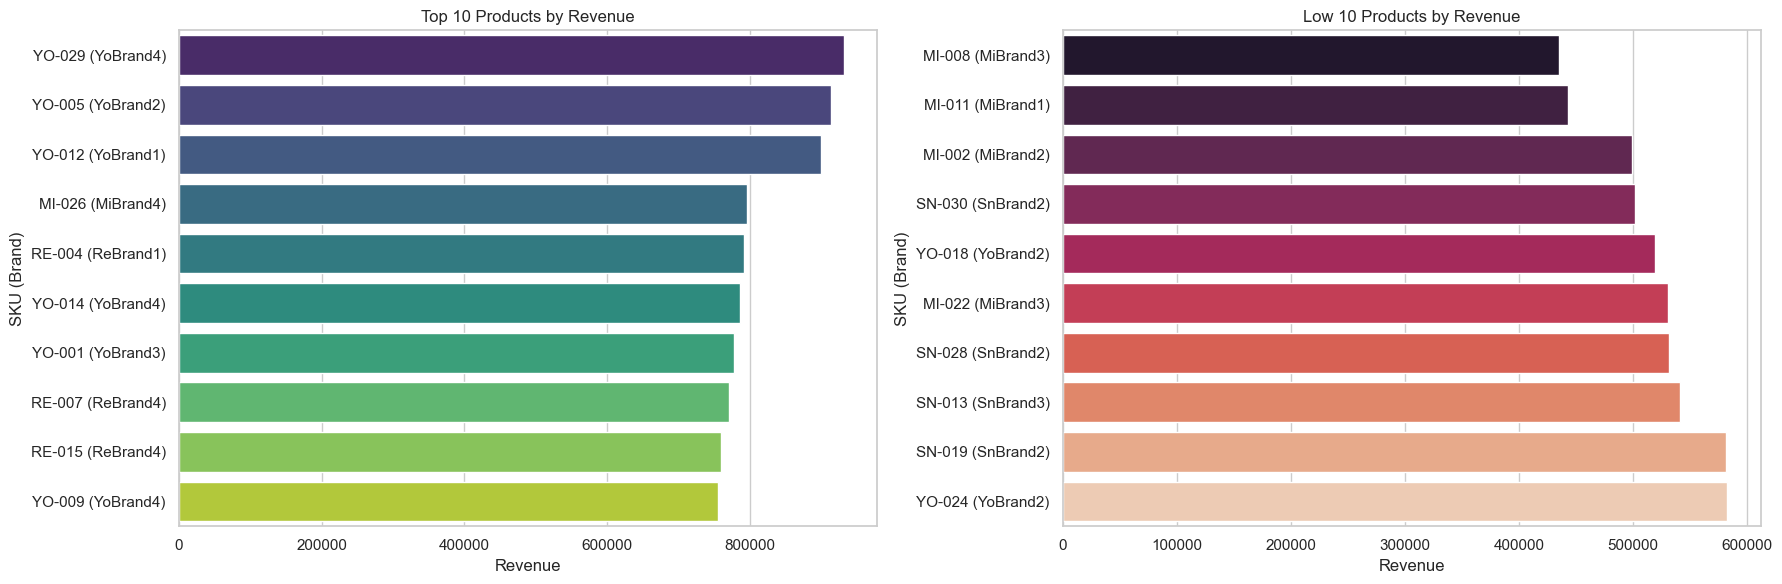

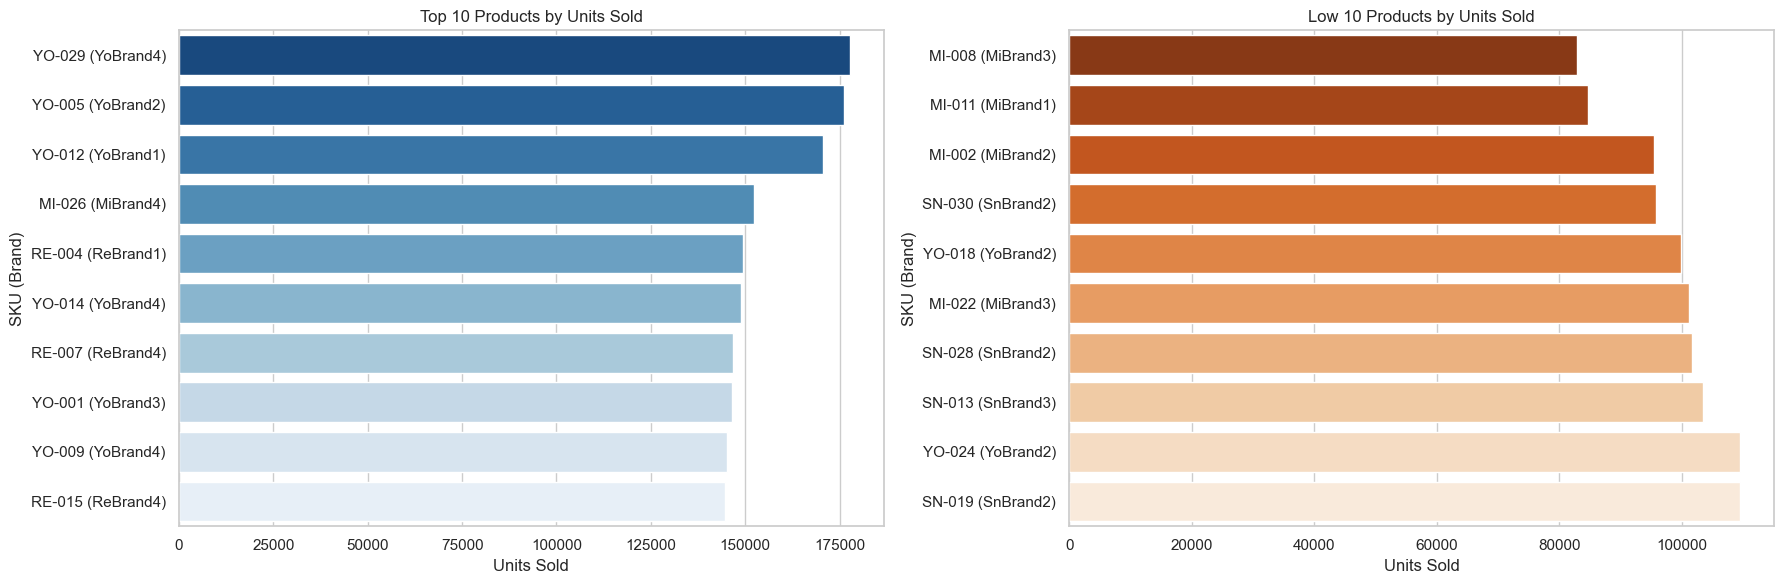

In [47]:
# SUBPLOTS: Top and low performers by revenue
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
top_sku_and_brand_rev = top_product_performers['sku'] + ' (' + top_product_performers['brand'] + ')'
sns.barplot(
    x='revenue',
    y=top_sku_and_brand_rev,
    data=top_product_performers,
    ax=axes[0],
    palette='viridis',
    hue=top_sku_and_brand_rev,
    legend=False
)
axes[0].set_title('Top 10 Products by Revenue')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('SKU (Brand)')

low_sku_and_brand_rev = low_product_performers['sku'] + ' (' + low_product_performers['brand'] + ')'
sns.barplot(
    x='revenue',
    y=low_sku_and_brand_rev,
    data=low_product_performers,
    ax=axes[1],
    palette='rocket',
    hue=low_sku_and_brand_rev,
    legend=False
)
axes[1].set_title('Low 10 Products by Revenue')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('SKU (Brand)')

plt.tight_layout()
plt.show()

# SUBPLOTS: Top and low performers by units sold
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
top_sku_and_brand_units = top_units_sold_performers['sku'] + ' (' + top_units_sold_performers['brand'] + ')'
sns.barplot(
    x='units_sold',
    y=top_sku_and_brand_units,
    data=top_units_sold_performers,
    ax=axes[0],
    palette='Blues_r',
    hue=top_sku_and_brand_units,
    legend=False
)
axes[0].set_title('Top 10 Products by Units Sold')
axes[0].set_xlabel('Units Sold')
axes[0].set_ylabel('SKU (Brand)')

low_sku_and_brand_units = low_units_sold_performers['sku'] + ' (' + low_units_sold_performers['brand'] + ')'
sns.barplot(
    x='units_sold',
    y=low_sku_and_brand_units,
    data=low_units_sold_performers,
    ax=axes[1],
    palette='Oranges_r',
    hue=low_sku_and_brand_units,
    legend=False
)
axes[1].set_title('Low 10 Products by Units Sold')
axes[1].set_xlabel('Units Sold')
axes[1].set_ylabel('SKU (Brand)')

plt.tight_layout()
plt.show()